In [1]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

In [2]:
model = Word2Vec.load("training/models/pretrained_embeddings")

In [3]:
words = model.wv.most_similar(positive = ["high-Tc_superconductor", "high-T_c_superconductor",
                                             "high-Tc_superconductors", "high-T_c_superconductors"], 
                                  topn = 5000)

In [4]:
ELEMENTS = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K",
            "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr",
            "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I",
            "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb",
            "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr",
            "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf",
            "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]

In [5]:
def is_formula(formula):
        N = len(formula)
        i = 0
        while i < N:
            if formula[i].isupper():
                if i < N - 1 and formula[i+1].islower and str(formula[i]+formula[i+1]) in ELEMENTS:
                    if i < N-2 and formula[i+2].isdigit():
                        if i < N-3 and formula[i+3].isdigit():
                            i += 4
                        else:
                            i += 3
                    else:
                        i += 2
                elif formula[i] in ELEMENTS:
                    if i < N - 1 and formula[i+1].isdigit():
                        if i < N-2 and formula[i+2].isdigit():
                            i += 3
                        else:
                            i += 2
                    else:
                        
                        i += 1
                else:
                    return False
            else:
                return False  
            
        return True
    
    
def atom_list(formula):
        N = len(formula)
        atoms = []
        i = 0
        for i in range(N):
            if formula[i].isupper():
                if i < N - 1 and formula[i+1].islower and str(formula[i]+formula[i+1]) in ELEMENTS:
                    atoms.append(str(formula[i]+formula[i+1]))
                elif formula[i] in ELEMENTS:
                    atoms.append(formula[i])
                
        return atoms 

SyntaxError: can't use starred expression here (<ipython-input-13-fe4ee1694cb8>, line 4)

In [14]:
candidates = []
atom_lists = []
for word in list(zip(*words))[0]:
    if is_formula(word):
        atoms = atom_list(word)
        if atoms not in atom_lists:
            candidates.append(word)
            atom_lists.append(atoms)

In [15]:
candidates

['Bi2CaCu2O8Sr2',
 'Ba2Cu3O7Y',
 'BSCCO',
 'Ba2CaCu2O8Tl2',
 'YBCO',
 'Cu20La37O80Sr3',
 'Ce3Cu20Nd37O80',
 'BaBiOPb',
 'Bi2CaCu2Sr2',
 'BaCaCuHgO',
 'Ba2Cu4Ho',
 'BaCuLaOSr',
 'As20Fe20O17Sm20',
 'Cu2O7',
 'Ag3Ba20Cu27Y10',
 'Bi2LaPb2Sr',
 'Ba8Cu12LuO28Y3',
 'Ba2BiCa10Cu15O5PbSr8Tl4',
 'BaCaCuOY',
 'Ba3Cu20La37O80',
 'Ce3Cu20La20O80Pr17',
 'Cr3Cu10Hg7O40Sr20',
 'Ba2CuO6Tl2',
 'As3Cr3K2',
 'As10FFe10Nd10O9',
 'BaBiPbSr',
 'B2CNi2Y',
 'Ba2CaTl2',
 'BBi2C2CaCu2O9SSr2',
 'Ba20Cu30Eu10O69',
 'HBCCO',
 'Ba2CuHgO4',
 'Ce3Cu20Eu37O80',
 'Ba3Cu6Gd3O14',
 'Tc',
 'As3Cr3Rb2',
 'Bi2CaCu2IO8Sr2',
 'As50Ba25Co2Fe48',
 'Ca8Cu20O70Pb5Sr20Tl5Y2',
 'B2RuY',
 'Ba2Cu3O7Yb',
 'Ge3NiY',
 'Ba3Bi5K2O15',
 'Ba2Cu30Y',
 'AsFFeGdO',
 'Ba2Cu2O7TlY',
 'As25F2Fe25La25O23',
 'CeCoIn',
 'Bi2CaO8Sr2',
 'LaMo6Se8',
 'CuLaNdOSr',
 'BaCaCuFHgO',
 'Ba2Ca2Cu3Tl2',
 'NCCO',
 'Ba2Cu3O7',
 'As40Ba13Fe40K7',
 'BISCCO',
 'B5C5O33Y5',
 'BaTl',
 'O4RuSr2',
 'Ba2Cu3O7Pr',
 'La37Sr3',
 'BaY',
 'As10Fe10Nd10O7',
 'Bi21Cu10O60Sr19',

In [16]:
embeddings = []
words = []
high_tc_similarity = []
wordtuples = []
for word in candidates:
    words.append(word)
    embeddings.append(model.wv[word])
    high_tc_similarity.append(model.wv.similarity(word, 'high-Tc_superconductor'))
    wordtuples.append((word, model.wv.similarity(word, 'high-Tc_superconductor')))

In [17]:
wordtuples = sorted(wordtuples, reverse = True, key=lambda x: x[1])

In [18]:
wordtuples

[('Bi2CaCu2O8Sr2', 0.76864284),
 ('Ba2Cu3O7Y', 0.767162),
 ('BSCCO', 0.75564665),
 ('Ba2CaCu2O8Tl2', 0.75308436),
 ('YBCO', 0.71038765),
 ('Cu20La37O80Sr3', 0.68869483),
 ('Ag3Ba20Cu27Y10', 0.6832819),
 ('As20Fe20O17Sm20', 0.67610824),
 ('BaBiOPb', 0.6757743),
 ('Ba2Cu3O7Yb', 0.67029595),
 ('BaCaCuHgO', 0.66304916),
 ('Ba3Cu20La37O80', 0.6625537),
 ('Ba8Cu12LuO28Y3', 0.6599235),
 ('Ba3Bi5K2O15', 0.65979546),
 ('Cr3Cu10Hg7O40Sr20', 0.6595094),
 ('Bi2CaCu2Sr2', 0.65911704),
 ('Ce3Cu20Nd37O80', 0.65839595),
 ('Tc', 0.65477896),
 ('BaBiPbSr', 0.65237653),
 ('Ba3Cu6Gd3O14', 0.64581454),
 ('Ba2BiCa10Cu15O5PbSr8Tl4', 0.64428884),
 ('Ba20Cu30Eu10O69', 0.643238),
 ('Ba2Cu4Ho', 0.6417379),
 ('Bi2CaO8Sr2', 0.6397699),
 ('HBCCO', 0.63950324),
 ('As10FFe10Nd10O9', 0.6382609),
 ('Ba2Cu4ErO8', 0.638074),
 ('As40Ba13Fe40K7', 0.6375652),
 ('Bi2LaPb2Sr', 0.63743365),
 ('NCCO', 0.63655597),
 ('BaCaCuOY', 0.6362759),
 ('As50Ba25Co2Fe48', 0.636157),
 ('BaCuLaOSr', 0.6359426),
 ('Ba2CuO6Tl2', 0.63141656),
 

In [21]:
viridis = cm.get_cmap('viridis', 5)

In [22]:
embeddings = np.array(embeddings)
tsne_model_in_2d = TSNE(perplexity=5, n_components=2, init = 'pca', n_iter=3500, random_state = 3)
embeddings_in_2d = np.array(tsne_model_in_2d.fit_transform(embeddings))

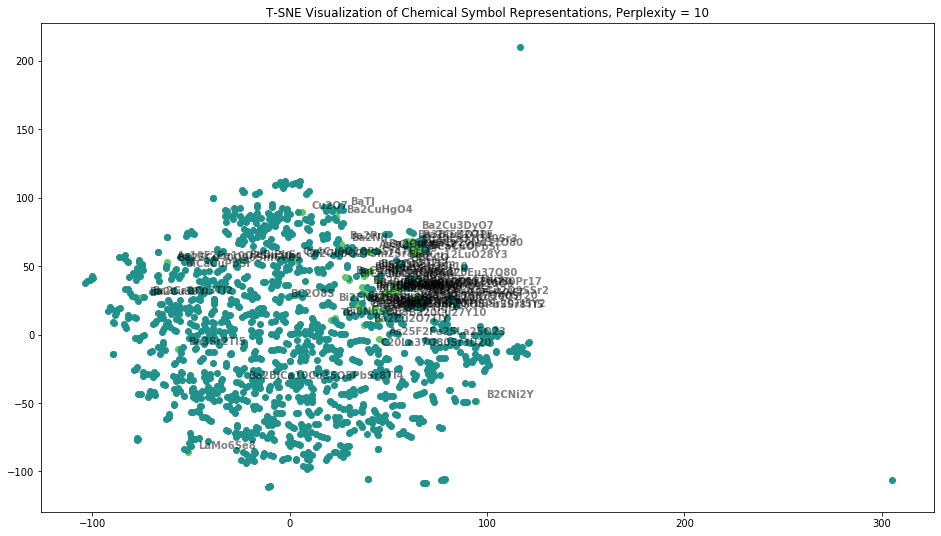

In [23]:
plt.figure(figsize = (16,9))
for i in range(len(embeddings_in_2d)):
    x = embeddings_in_2d[i][0]
    y = embeddings_in_2d[i][1]
    plt.scatter(x, y, color = viridis(high_tc_similarity[i]) )
    if 0.6 < high_tc_similarity[i] < 0.7:
        plt.annotate(words[i], alpha=0.5, xy = (x,y), xytext = (10,4), weight = 'bold', textcoords="offset points")
plt.title("T-SNE Visualization of Chemical Symbol Representations, Perplexity = 10")
plt.show()